In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import imageio

In [17]:
HEIGHT = 1000
WIDTH = HEIGHT
NUM_CHANNELS = 3

# Center and radius of the circle
center_x, center_y, = HEIGHT // 2, WIDTH // 2

In [18]:
def create_semi_circle(color, radius, start_angle, end_angle):
    # Create black image
    image = np.zeros((HEIGHT, WIDTH, NUM_CHANNELS), dtype=np.uint8)

    # Generate grid of coordinates
    yy, xx = np.mgrid[:HEIGHT, :WIDTH]

    # Circle equation
    circle = (xx - center_x) ** 2 + (yy - center_y) ** 2

    # Boolean mask for the circle area
    mask = circle < radius ** 2

    # Compute angles
    angles = np.rad2deg(np.arctan2(center_x - xx, center_y - yy)) % 360

    # Remove a portion from degrees
    if end_angle < start_angle:
        slice_mask = np.logical_or(angles > start_angle, angles < end_angle)
    else:
        slice_mask = np.logical_and(angles > start_angle, angles < end_angle)

    # Add a red circle to the image using the mask
    image[np.logical_and(mask, np.logical_not(~slice_mask))] = color

    image = np.fliplr(image)

    return image

In [19]:
def create_time_deg(time):
    time[0] = time[0] - ((time[0] - 1) // 12) * 12

    time_deg = [0,0,0]
    time_deg[2] = time[2] * 360 / 60
    time_deg[1] = time[1] * 360 / 60 + time_deg[2] / 60
    time_deg[0] = time[0] * 360 / 12 + time_deg[1] / 12


    return time_deg

In [20]:
def create_watch(time_deg):
    t = 2
    r_pos = [time_deg[1] - t, time_deg[0] + t]
    g_pos = [time_deg[2] - t, time_deg[1] + t]
    b_pos = [time_deg[0] - t, time_deg[2] + t]



    radius_a, radius_b, radius_c = (HEIGHT * 0.8)//2, (HEIGHT * 0.6)//2, (HEIGHT * 0.4)//2
    img_r = create_semi_circle(color=[255,0,0], radius=radius_a, start_angle=r_pos[0], end_angle=r_pos[1])
    img_g = create_semi_circle(color=[0,255,0], radius=radius_b, start_angle=g_pos[0], end_angle=g_pos[1])
    img_b = create_semi_circle(color=[0,0,255], radius=radius_c, start_angle=b_pos[0], end_angle=b_pos[1])

    return img_r+img_g+img_b


In [21]:
def format_time(time_list):
    final_str = ""
    for num in time_list:
        if num < 10:
            final_str = final_str + "0"
        final_str = final_str + str(num)
        final_str = final_str + ":"

    return final_str[:-1]

[359.9916666666667, 359.9, 354.0]


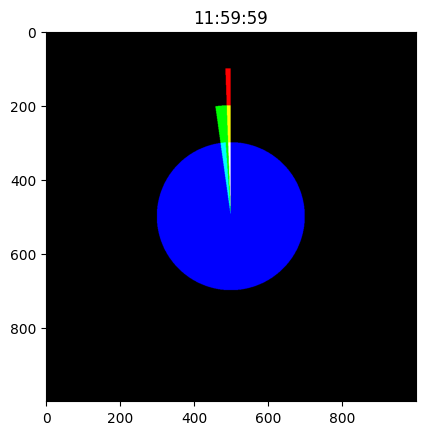

In [23]:
now_time = [np.random.randint(0,23), np.random.randint(0,59), np.random.randint(0,59)]


for now_time in [[11,59,59]]:
    degrees_time = create_time_deg(now_time)
    print(degrees_time)
    new_img = create_watch(degrees_time)
    plt.imshow(new_img)
    plt.title(format_time(now_time))
    plt.savefig(f"{now_time}.png")
    plt.show()


KeyboardInterrupt: 

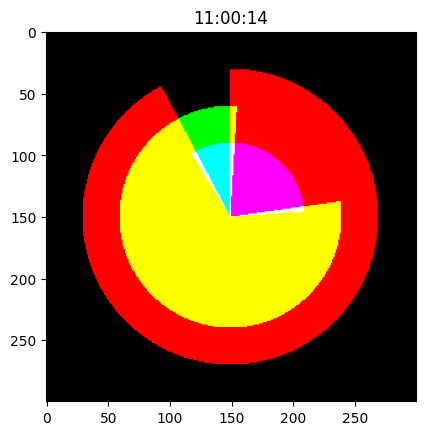

In [11]:
for hour in np.arange(11, 12, 1):
    for minute in np.arange(0,60, 1):
        for second in np.arange(0,60, 1):
            now_time = [hour, minute, second]
            degrees_time = create_time_deg(now_time)
            new_img = create_watch(degrees_time)
            plt.imshow(new_img)
            formatted_time = format_time(now_time)
            plt.title(formatted_time)
            formatted_time = formatted_time.replace(":","_")
            plt.savefig(f"output_images/{formatted_time}")